In [422]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [423]:
# 결측치 확인하는 라이브러리
import missingno as msno

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [424]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [425]:
bike = pd.read_csv("C:/Users/정가경/Downloads/train (2).csv",encoding = 'cp949')
test = pd.read_csv("C:/Users/정가경/Downloads/test.csv",encoding = 'cp949')
df = bike.copy()
df1 = test.copy()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [426]:
df1.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11/07/2018,22,27.1,79,1.2,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes
1,28/11/2018,11,5.7,15,1.1,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes
2,18/04/2018,15,19.0,21,3.3,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes
3,09/03/2018,14,8.0,42,NaN,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes
4,28/10/2018,16,12.2,65,1.9,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes


# 전체 데이터 확인하기

In [427]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [428]:
df1.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,1752.000000,1578.000000,1752.000000,1581.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,11.261416,13.011534,58.563356,1.704428,1421.082763,4.200799,0.547249,0.142352,0.074144
std,6.915261,11.734732,20.118850,1.057316,611.223099,12.816865,0.845112,1.102496,0.419689
min,0.000000,-17.500000,0.000000,0.000000,33.000000,-29.800000,0.000000,0.000000,0.000000
25%,5.000000,3.500000,43.000000,0.900000,920.000000,-4.325000,0.000000,0.000000,0.000000
50%,11.000000,13.800000,58.000000,1.500000,1666.000000,5.000000,0.010000,0.000000,0.000000
75%,17.000000,22.300000,75.000000,2.300000,1995.000000,14.700000,0.912500,0.000000,0.000000
max,23.000000,37.900000,98.000000,6.700000,2000.000000,26.000000,3.520000,24.000000,6.000000


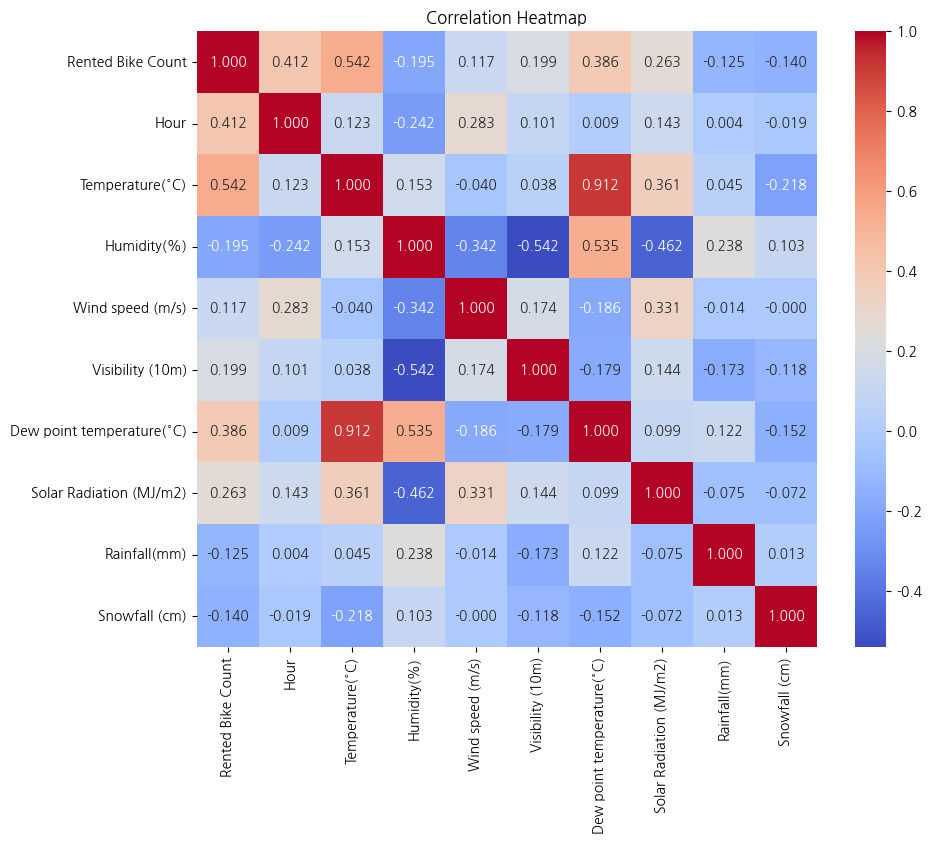

In [429]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_corr=df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

In [430]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df=df.sort_values(['Date','Hour'])
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [431]:
df1['Date']=pd.to_datetime(df1['Date'],dayfirst=True)
df1=df1.sort_values(['Date','Hour'])
df1=df1.reset_index()
df1=df1.drop('index',axis=1)
df1.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-02,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-02,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-02,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7008 non-null   datetime64[ns]
 1   Rented Bike Count          7008 non-null   int64         
 2   Hour                       7008 non-null   int64         
 3   Temperature(°C)            6306 non-null   float64       
 4   Humidity(%)                7008 non-null   int64         
 5   Wind speed (m/s)           6303 non-null   float64       
 6   Visibility (10m)           7008 non-null   int64         
 7   Dew point temperature(°C)  7008 non-null   float64       
 8   Solar Radiation (MJ/m2)    7008 non-null   float64       
 9   Rainfall(mm)               7008 non-null   float64       
 10  Snowfall (cm)              7008 non-null   float64       
 11  Seasons                    6309 non-null   object        
 12  Holida

### 결측치 확인하기

In [433]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
dtype: int64

In [434]:
df1.isna().sum()

Date                           0
Hour                           0
Temperature(°C)              174
Humidity(%)                    0
Wind speed (m/s)             171
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      177
Holiday                        0
Functioning Day                0
dtype: int64

test set과 결측치인 변수가 같다

### 전체값이 전부 na인 열 삭제하기

In [435]:
df.dropna(axis=1,how='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,NaN,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [436]:
df1.dropna(axis=1,how='all')

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-02,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-02,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-02,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,NaN,No Holiday,Yes
1748,2018-11-30,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
1749,2018-11-30,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
1750,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


### 계절 결측치 채우기

In [437]:
for i in range(1,13):
    print(df.loc[df['Date'].dt.month==i]['Seasons'])

594     Winter
595     Winter
596     Winter
597     Winter
598     Winter
         ...  
1205    Winter
1206    Winter
1207    Winter
1208    Winter
1209    Winter
Name: Seasons, Length: 616, dtype: object
1210    Winter
1211    Winter
1212    Winter
1213    Winter
1214    Winter
         ...  
1745    Winter
1746    Winter
1747    Winter
1748    Winter
1749    Winter
Name: Seasons, Length: 540, dtype: object
1750    Spring
1751    Spring
1752    Spring
1753    Spring
1754    Spring
         ...  
2315    Spring
2316       NaN
2317    Spring
2318    Spring
2319    Spring
Name: Seasons, Length: 570, dtype: object
2320    Spring
2321    Spring
2322    Spring
2323    Spring
2324    Spring
         ...  
2885    Spring
2886    Spring
2887    Spring
2888    Spring
2889    Spring
Name: Seasons, Length: 570, dtype: object
2890    Spring
2891    Spring
2892       NaN
2893    Spring
2894    Spring
         ...  
3472    Spring
3473       NaN
3474    Spring
3475    Spring
3476    Spring
Name: S

In [438]:
df.loc[df['Date'].dt.month.isin([12,1,2]),'Seasons'] = 'Winter'
df.loc[df['Date'].dt.month.isin([3,4,5]),'Seasons'] = 'Spring'
df.loc[df['Date'].dt.month.isin([6,7,8]),'Seasons'] = 'Summer'
df.loc[df['Date'].dt.month.isin([9,10,11]),'Seasons'] = 'Autumn'
df['Seasons'].isna().sum()

0

같은 기준으로 test셋도 처리해준다.

In [439]:
df1.loc[df1['Date'].dt.month.isin([12,1,2]),'Seasons'] = 'Winter'
df1.loc[df1['Date'].dt.month.isin([3,4,5]),'Seasons'] = 'Spring'
df1.loc[df1['Date'].dt.month.isin([6,7,8]),'Seasons'] = 'Summer'
df1.loc[df1['Date'].dt.month.isin([9,10,11]),'Seasons'] = 'Autumn'
df1['Seasons'].isna().sum()

0

### 온도 결측치 채우기

시계열 데이터임을 고려하여 채우기

In [440]:
df['Temperature(°C)'].interpolate(method='spline', order=3, inplace=True)

In [441]:
df1['Temperature(°C)'].interpolate(method='spline', order=3, inplace=True)

In [442]:
df1[df1['Temperature(°C)'].isna()]

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [443]:
df1

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-02,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-02,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-02,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
1748,2018-11-30,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
1749,2018-11-30,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
1750,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


### 풍속 결측치 채우기

In [445]:
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].interpolate(method = 'spline', order = 3)
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [446]:
df1['Wind speed (m/s)'] = df['Wind speed (m/s)'].interpolate(method = 'spline', order = 3)
df1.isna().sum()

Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## 이상치 처리하기

지난 과제에서 처럼 습도가 0인 행들을 처리해주고자 한다.

In [447]:
df.loc[df['Humidity(%)']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3273,2018-05-21,165,3,13.000000,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes
3274,2018-05-21,113,4,12.400000,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
3275,2018-05-21,200,5,11.900000,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes
3276,2018-05-21,467,6,11.400000,0,0.900000,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes
3289,2018-05-22,406,3,15.955655,0,0.700000,1420,10.4,0.00,0.0,0.0,Spring,Holiday,Yes
3290,2018-05-22,248,4,15.600000,0,0.500000,1502,10.5,0.00,0.0,0.0,Spring,Holiday,Yes
3291,2018-05-22,182,5,15.700000,0,0.600000,1610,10.6,0.00,0.0,0.0,Spring,Holiday,Yes
3292,2018-05-22,277,6,15.500000,0,0.500000,1691,10.4,0.06,0.0,0.0,Spring,Holiday,Yes
3385,2018-05-27,174,5,17.600000,0,0.800000,1304,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes
3387,2018-05-27,341,7,17.600000,0,1.771237,1219,8.7,0.34,0.0,0.0,Spring,No Holiday,Yes


In [448]:
df.loc[(df['Date'] == '2018-05-21') & (df['Humidity(%)'] == 0),'Humidity(%)']= round(df[df['Date']=='2018-05-21'].loc[df['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df.loc[(df['Date'] == '2018-05-22') & (df['Humidity(%)'] == 0),'Humidity(%)']= round(df[df['Date']=='2018-05-22'].loc[df['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df.loc[(df['Date'] == '2018-05-27') & (df['Humidity(%)'] == 0),'Humidity(%)']= round(df[df['Date']=='2018-05-27'].loc[df['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df.loc[(df['Date'] == '2018-05-28') & (df['Humidity(%)'] == 0),'Humidity(%)']= round(df[df['Date']=='2018-05-28'].loc[df['Humidity(%)']!=0,'Humidity(%)'].mean(),0)

In [449]:
print(df[(df['Date'] == '2018-05-21')])
print(df[(df['Date'] == '2018-05-22')])
print(df[(df['Date'] == '2018-05-27')])
print(df[(df['Date'] == '2018-05-28')])

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3271 2018-05-21                666     0        15.300000           29   
3272 2018-05-21                420     1        12.143535           31   
3273 2018-05-21                165     3        13.000000           40   
3274 2018-05-21                113     4        12.400000           40   
3275 2018-05-21                200     5        11.900000           40   
3276 2018-05-21                467     6        11.400000           40   
3277 2018-05-21               1785     8        15.300000           30   
3278 2018-05-21               1118     9        17.700000           27   
3279 2018-05-21               1129    11        20.900000           27   
3280 2018-05-21               1373    12        21.800000           31   
3281 2018-05-21               1456    13        22.800000           31   
3282 2018-05-21               1483    14        23.400000           36   
3283 2018-05-21               1612    

In [450]:
df1.loc[df1['Humidity(%)']==0]

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
820,2018-05-19,7,11.4,0,1.1,2000,4.5,0.46,0.0,0.0,Spring,No Holiday,Yes
833,2018-05-21,2,13.9,0,1.1,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
834,2018-05-21,7,12.3,0,0.7,1989,-2.7,0.48,0.0,0.0,Spring,No Holiday,Yes
873,2018-05-28,5,16.6,0,0.8,1361,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes


In [451]:
df1.loc[(df['Date'] == '2017-12-03') & (df1['Humidity(%)'] == 0),'Humidity(%)']= round(df1[df1['Date']=='2017-12-03'].loc[df1['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df1.loc[(df['Date'] == '2018-01-05') & (df1['Humidity(%)'] == 0),'Humidity(%)']= round(df1[df1['Date']=='2018-01-05'].loc[df1['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df1.loc[(df['Date'] == '2018-02-02') & (df1['Humidity(%)'] == 0),'Humidity(%)']= round(df1[df1['Date']=='2018-02-02'].loc[df1['Humidity(%)']!=0,'Humidity(%)'].mean(),0)
df1.loc[(df['Date'] == '2018-08-11') & (df1['Humidity(%)'] == 0),'Humidity(%)']= round(df1[df1['Date']=='2018-08-11'].loc[df1['Humidity(%)']!=0,'Humidity(%)'].mean(),0)

In [452]:
print(df1[(df1['Date'] == '2017-12-03')])

        Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
5 2017-12-03     0              4.0           58               1.5   
6 2017-12-03     5              3.9           75               1.3   
7 2017-12-03     9              3.5           91               0.9   
8 2017-12-03    17              6.7           82               1.1   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
5              1296                       -3.5                     0.00   
6               914                       -0.1                     0.00   
7               231                        2.1                     0.02   
8               358                        3.8                     0.05   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
5           0.0            0.0  Winter  No Holiday             Yes  
6           0.0            0.0  Winter  No Holiday             Yes  
7           2.5            0.0  Winter  No Holiday             Yes

### 원핫 인코더 사용하기

In [453]:
df1

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,17,0.8,58,2.200000,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,1,-2.2,86,0.800000,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-02,9,-2.9,68,1.000000,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-02,11,1.9,49,0.900000,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-02,20,4.6,51,1.580633,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,0,1.8,62,2.500000,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
1748,2018-11-30,10,1.9,51,1.900000,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
1749,2018-11-30,16,7.2,23,1.200000,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
1750,2018-11-30,20,3.4,37,1.300000,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [454]:
ohe = OneHotEncoder(sparse_output=False)
ohe1 = OneHotEncoder(sparse_output=False)
result_ohe = ohe.fit_transform(df[['Seasons','Hour','Functioning Day','Holiday']])
result_ohe1 = ohe1.fit_transform(df1[['Seasons','Hour','Functioning Day','Holiday']])
result_ohe

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [455]:
result_ohe1

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [456]:
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [457]:
ohe1.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array(['No', 'Yes'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [458]:
result_ohe1.shape[1]

32

In [459]:
df_ohe = pd.DataFrame(result_ohe,columns = ohe.get_feature_names_out(['Seasons','Hour','Functioning Day','Holiday']))

In [460]:
df_ohe1 = pd.DataFrame(result_ohe1,columns = ohe1.get_feature_names_out(['Seasons','Hour','Functioning Day','Holiday']))

In [461]:
df_v2 = pd.concat([df, df_ohe], axis=1) #merge와 다르게 정말 단순 합치기
df_v1 = pd.concat([df1,df_ohe1],axis=1)

In [462]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7008 non-null   datetime64[ns]
 1   Rented Bike Count          7008 non-null   int64         
 2   Hour                       7008 non-null   int64         
 3   Temperature(°C)            7008 non-null   float64       
 4   Humidity(%)                7008 non-null   int64         
 5   Wind speed (m/s)           7008 non-null   float64       
 6   Visibility (10m)           7008 non-null   int64         
 7   Dew point temperature(°C)  7008 non-null   float64       
 8   Solar Radiation (MJ/m2)    7008 non-null   float64       
 9   Rainfall(mm)               7008 non-null   float64       
 10  Snowfall (cm)              7008 non-null   float64       
 11  Seasons                    7008 non-null   object        
 12  Holida

In [463]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1752 non-null   datetime64[ns]
 1   Hour                       1752 non-null   int64         
 2   Temperature(°C)            1752 non-null   float64       
 3   Humidity(%)                1752 non-null   int64         
 4   Wind speed (m/s)           1752 non-null   float64       
 5   Visibility (10m)           1752 non-null   int64         
 6   Dew point temperature(°C)  1752 non-null   float64       
 7   Solar Radiation (MJ/m2)    1752 non-null   float64       
 8   Rainfall(mm)               1752 non-null   float64       
 9   Snowfall (cm)              1752 non-null   float64       
 10  Seasons                    1752 non-null   object        
 11  Holiday                    1752 non-null   object        
 12  Functi

In [464]:
df_fin = df_v2.drop(['Seasons','Hour','Functioning Day','Holiday'],axis=1)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7008 non-null   datetime64[ns]
 1   Rented Bike Count          7008 non-null   int64         
 2   Temperature(°C)            7008 non-null   float64       
 3   Humidity(%)                7008 non-null   int64         
 4   Wind speed (m/s)           7008 non-null   float64       
 5   Visibility (10m)           7008 non-null   int64         
 6   Dew point temperature(°C)  7008 non-null   float64       
 7   Solar Radiation (MJ/m2)    7008 non-null   float64       
 8   Rainfall(mm)               7008 non-null   float64       
 9   Snowfall (cm)              7008 non-null   float64       
 10  Seasons_Autumn             7008 non-null   float64       
 11  Seasons_Spring             7008 non-null   float64       
 12  Season

In [465]:
df1_fin = df_v1.drop(['Seasons','Hour','Functioning Day','Holiday'],axis=1)
df1_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1752 non-null   datetime64[ns]
 1   Temperature(°C)            1752 non-null   float64       
 2   Humidity(%)                1752 non-null   int64         
 3   Wind speed (m/s)           1752 non-null   float64       
 4   Visibility (10m)           1752 non-null   int64         
 5   Dew point temperature(°C)  1752 non-null   float64       
 6   Solar Radiation (MJ/m2)    1752 non-null   float64       
 7   Rainfall(mm)               1752 non-null   float64       
 8   Snowfall (cm)              1752 non-null   float64       
 9   Seasons_Autumn             1752 non-null   float64       
 10  Seasons_Spring             1752 non-null   float64       
 11  Seasons_Summer             1752 non-null   float64       
 12  Season

# valid,train 셋 분리

input과 output 구분하기

In [466]:
x = df_fin.drop('Rented Bike Count',axis=1)
y = df_fin['Rented Bike Count']

In [467]:
# 타이타닉 데이터와는 다르게 y값이 연속형이기 때문에 stratify 사용하지 않기
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state=100 )
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(5606, 41) (5606,) (1402, 41) (1402,)


# 변수 스케일링

KNN,SVM과 같은 여러 알고리즘에서는 변수 간의 거리가 크기에 민감하기에 스케일링을 진행한다. 또한 변수 간 거리가 민감하지 않은 알고리즘의 경우에도 과적합 방지나 학습 속도 향상을 위해서 스케일링을 하기로 한다. 

In [468]:
x_train_date = x_train['Date']
x_valid_date = x_valid['Date']
x_train_bs = x_train.drop('Date',axis=1)
x_valid_bs = x_valid.drop('Date',axis=1)

## Standard Scaler

In [469]:
ss = StandardScaler()

x_train_ss = ss.fit_transform(x_train_bs) #모델 학습시키고 적용하기
x_val_ss = ss.transform(x_valid_bs) # train data만 fit을 사용함 valid,test는 train에 fit된대로 scale되어야함


print("<train 셋>")
print(f'평균: {x_train_ss.mean()}\n분산: {x_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {x_val_ss.mean()}\n분산: {x_val_ss.std()}')

<train 셋>
평균: 6.559148515088331e-18
분산: 0.9999999999999999
<valid 셋>
평균: 0.0030405850423613685
분산: 1.0145635092857797


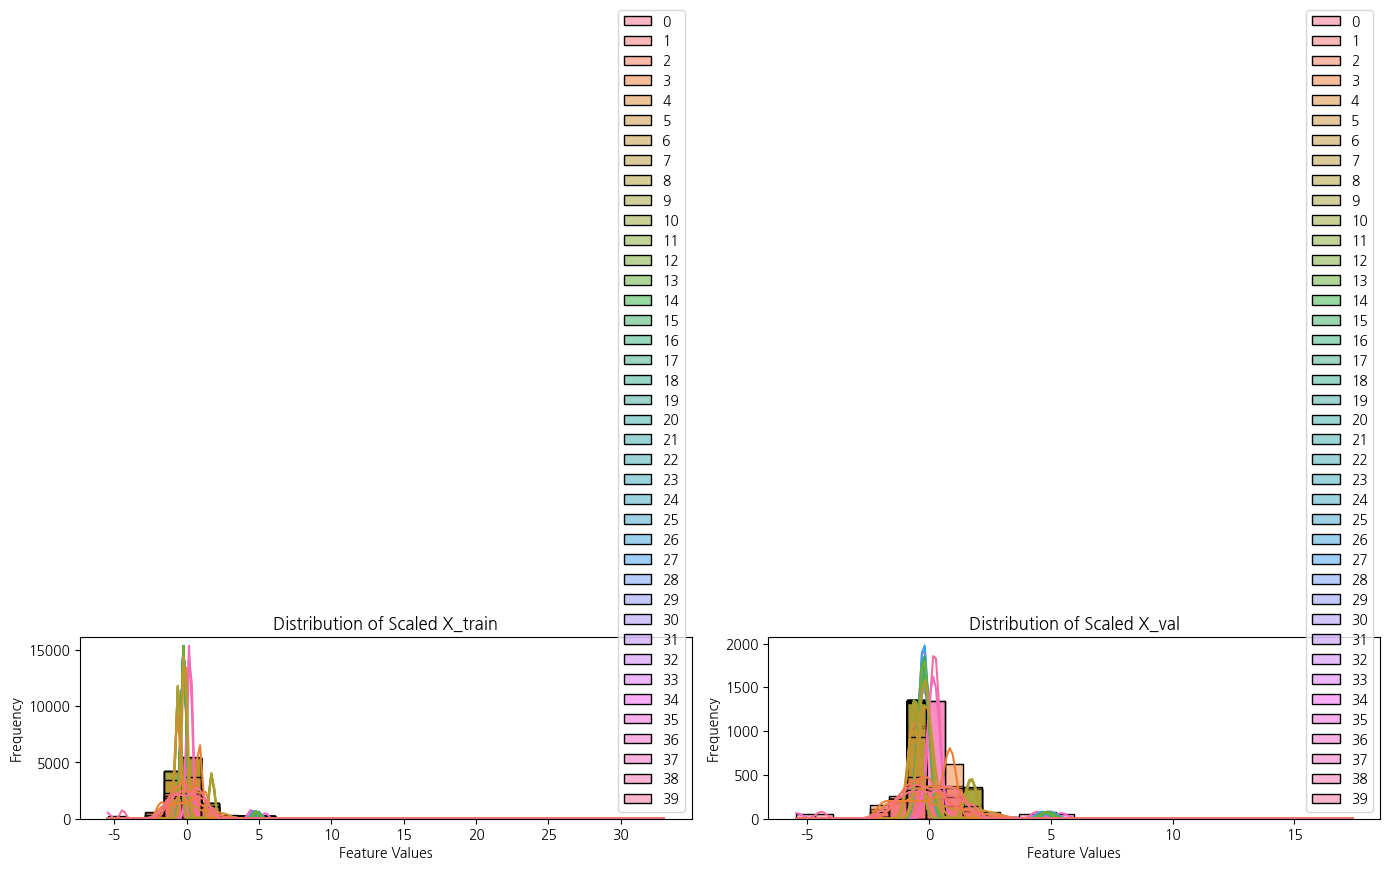

In [470]:
# 히스토그램 및 KDE 플롯 그리기
plt.figure(figsize=(14, 6))

# Train 셋 분포
plt.subplot(1, 2, 1)
sns.histplot(x_train_ss, kde=True, bins=30, color='blue')
plt.title('Distribution of Scaled X_train')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

# Validation 셋 분포
plt.subplot(1, 2, 2)
sns.histplot(x_val_ss, kde=True, bins=30, color='orange')
plt.title('Distribution of Scaled X_val')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## MinMax Scaler

In [471]:
mms = MinMaxScaler()

x_train_mms = mms.fit_transform(x_train_bs)
x_val_mms = mms.transform(x_valid_bs) 

print("<train 셋>")
print(f'최대: {x_train_mms.max()}\n최소: {x_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {x_val_mms.max()}\n최소: {x_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0
최소: -0.005272407732864692


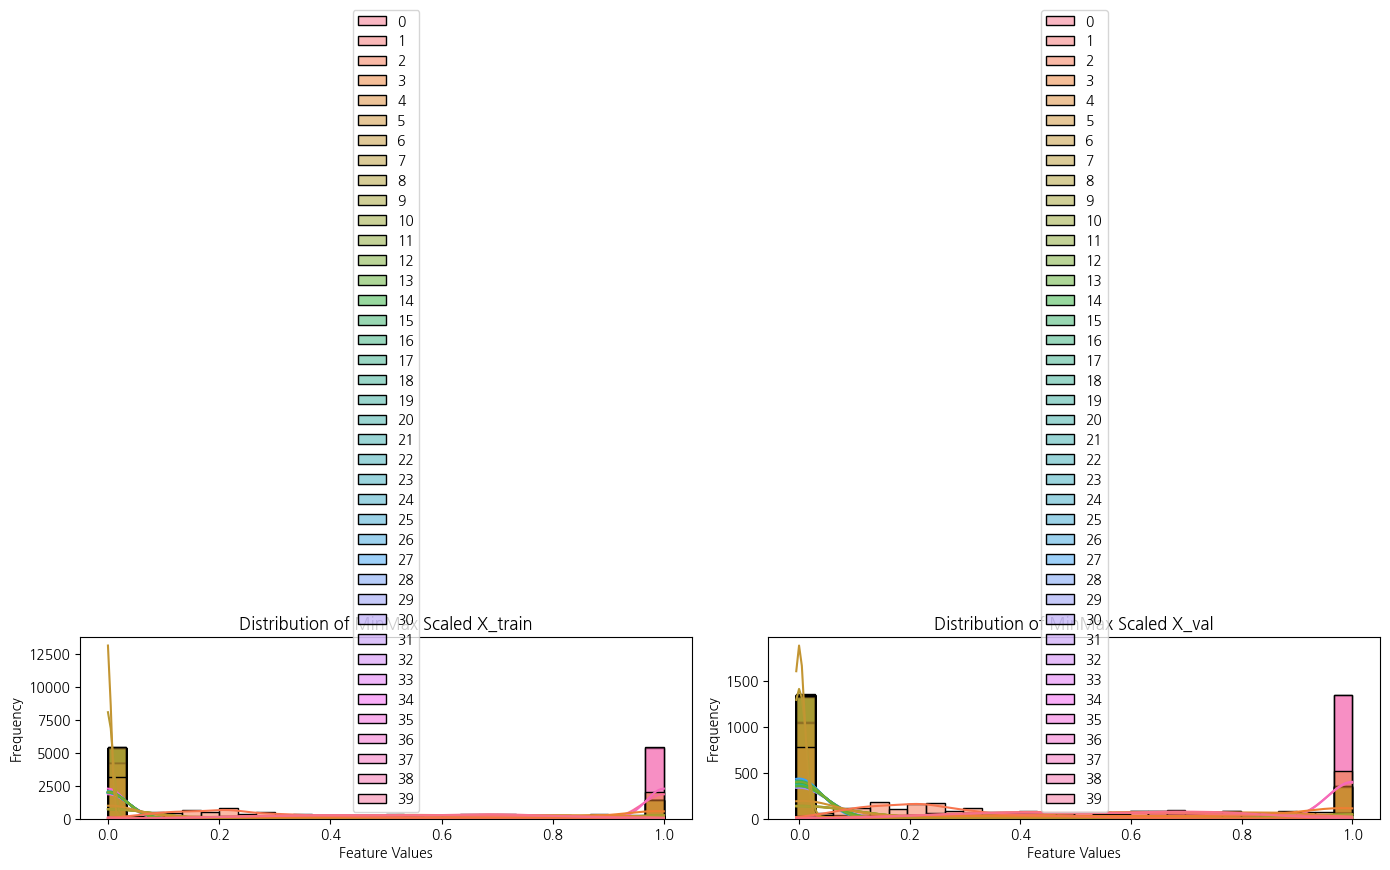

In [472]:
# 히스토그램 그리기
plt.figure(figsize=(14, 6))

# Train 셋 분포
plt.subplot(1, 2, 1)
sns.histplot(x_train_mms, kde=True, bins=30, color='green')
plt.title('Distribution of MinMax Scaled X_train')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

# Validation 셋 분포
plt.subplot(1, 2, 2)
sns.histplot(x_val_mms, kde=True, bins=30, color='red')
plt.title('Distribution of MinMax Scaled X_val')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## MaxAbs Scaler

In [473]:
mas = MaxAbsScaler()

x_train_mas = mas.fit_transform(x_train_bs)
x_val_mas = mas.transform(x_valid_bs) 

print("<train 셋>")
print(f'최대: {x_train_mas.max()}\n최소: {x_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {x_val_mas.max()}\n최소: {x_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9640522875816993


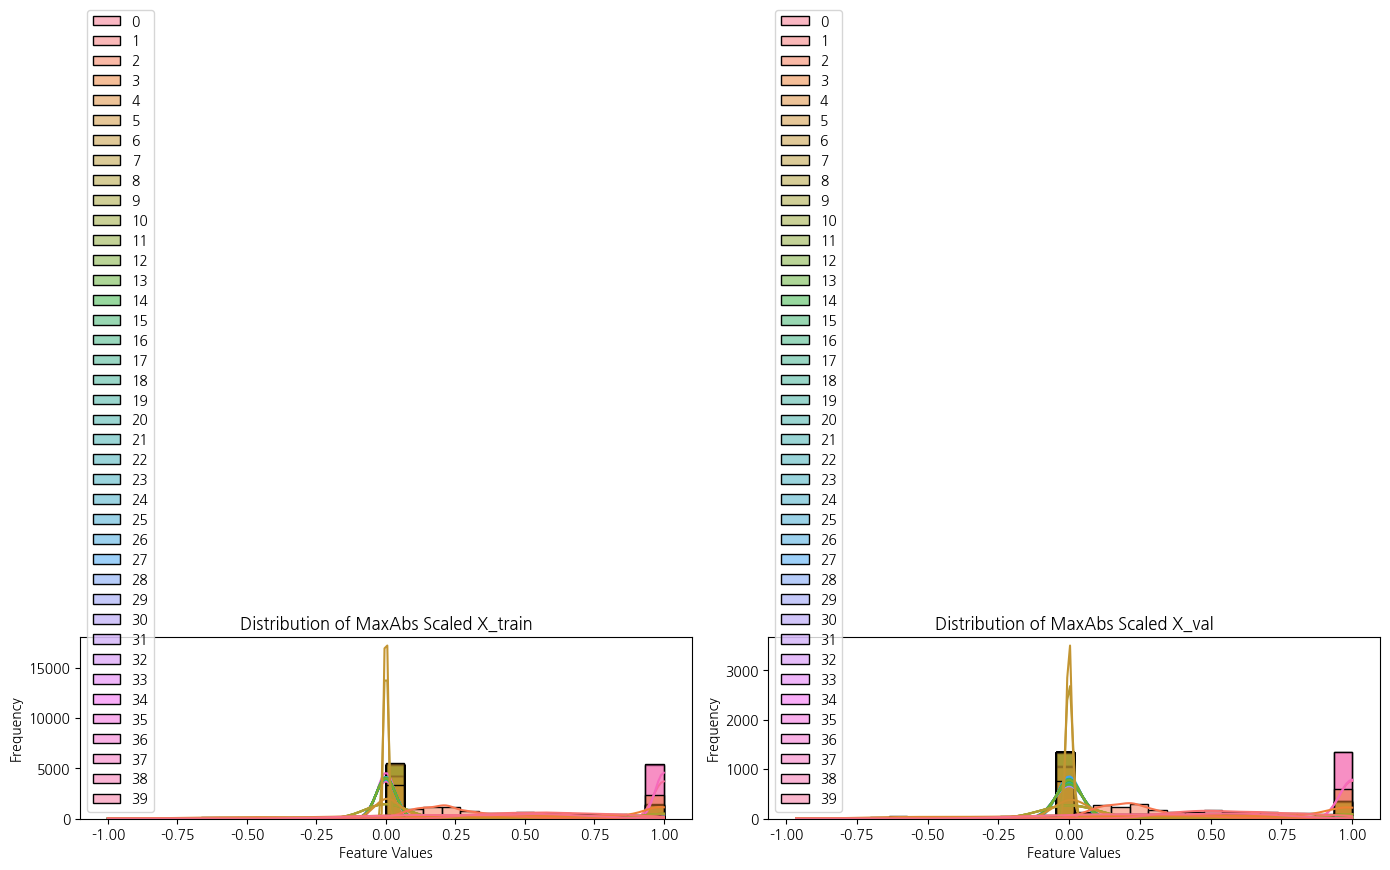

In [474]:
# 히스토그램 및 KDE 플롯 그리기
plt.figure(figsize=(14, 6))

# Train 셋 분포
plt.subplot(1, 2, 1)
sns.histplot(x_train_mas, kde=True, bins=30, color='purple')
plt.title('Distribution of MaxAbs Scaled X_train')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

# Validation 셋 분포
plt.subplot(1, 2, 2)
sns.histplot(x_val_mas, kde=True, bins=30, color='orange')
plt.title('Distribution of MaxAbs Scaled X_val')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Robust Scaler

In [475]:
rs = RobustScaler()

x_train_rs = rs.fit_transform(x_train_bs) #모델 학습시키고 적용하기
x_val_rs = rs.transform(x_valid_bs) # train data만 fit을 사용함 valid,test는 train에 fit된대로 scale되어야함

print("<train 셋>")
print(f'평균: {x_train_rs.mean()}\n분산: {x_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {x_val_rs.mean()}\n분산: {x_val_rs.std()}')

<train 셋>
평균: 0.06503701577761924
분산: 0.4119608321438544
<valid 셋>
평균: 0.06747916042976634
분산: 0.4408776515983781


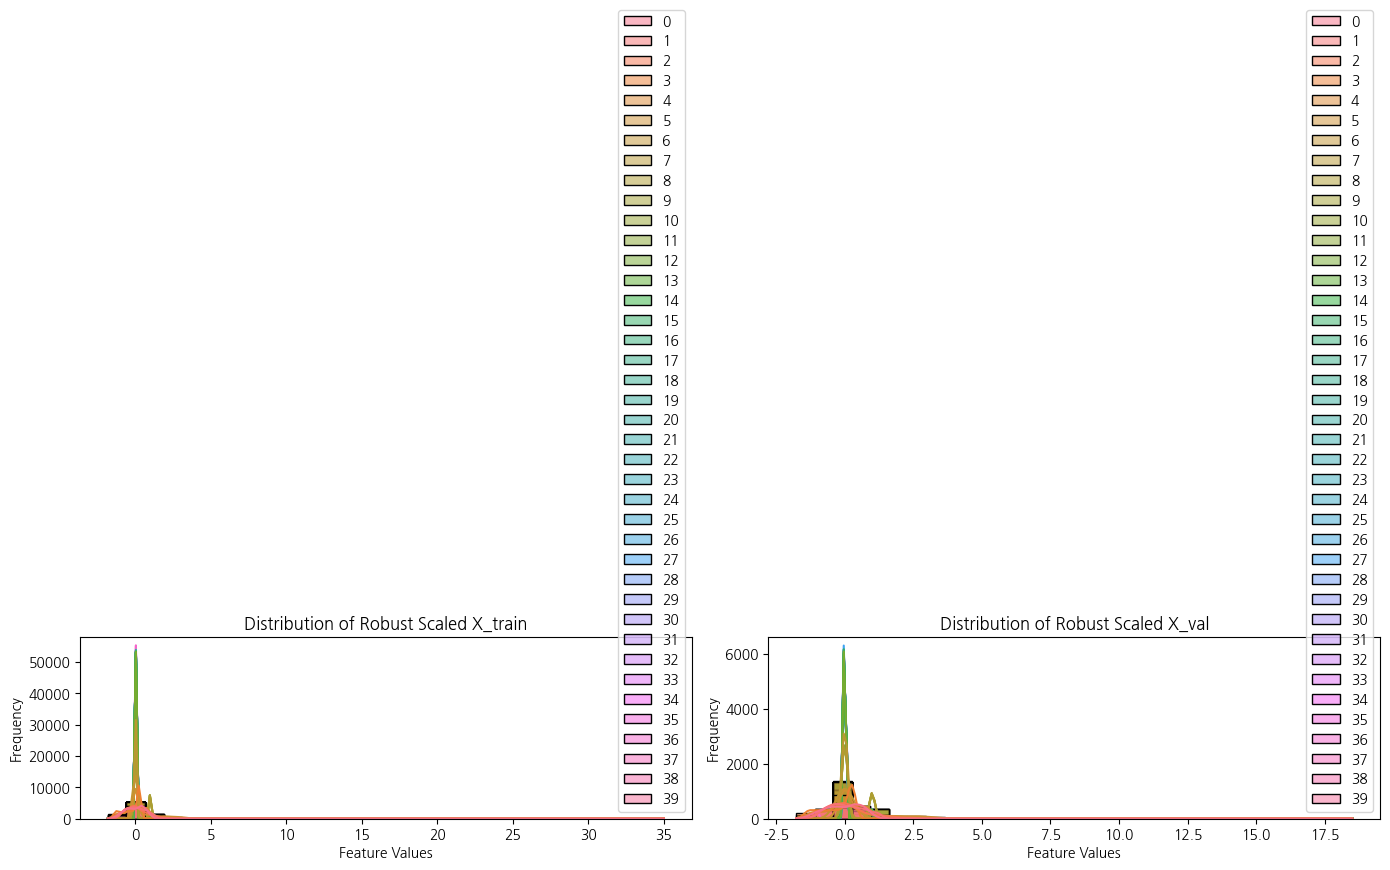

In [476]:
# 히스토그램 및 KDE 플롯 그리기
plt.figure(figsize=(14, 6))

# Train 셋 분포
plt.subplot(1, 2, 1)
sns.histplot(x_train_rs, kde=True, bins=30, color='blue')
plt.title('Distribution of Robust Scaled X_train')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

# Validation 셋 분포
plt.subplot(1, 2, 2)
sns.histplot(x_val_rs, kde=True, bins=30, color='green')
plt.title('Distribution of Robust Scaled X_val')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 모델 학습

## KNN 알고리즘

KNN 알고리즘은 모델을 따로 구축하는 것이 아니라 거리 기반 모델이기 때문에 변수들의 단위에 민감하다. 따라서 스케일링 과정이 필수적이라고 볼 수 있는 모델이다. 노이즈에 민감하지 않기에 데이터가 많을 때 큰 효과를 볼 수 있다. 하지만 k의 갯수를 적절히 결정하는 것을 사용자가 임의로 선정해야하기에 어렵다. 나는 정규화한 데이터를 가지고 모델 학습을 진행하겠다.

In [477]:
from sklearn.neighbors import KNeighborsRegressor 
knr = KNeighborsRegressor()

In [478]:
knr.fit(x_train_ss,y_train) # k=5

KNeighborsRegressor()

In [479]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(knr.score(x_train_ss, y_train)) # R squered
print(knr.score(x_val_ss, y_valid))
pred = knr.predict(x_val_ss)

mae = mean_absolute_error(y_valid, pred)
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mean_squared_error(y_valid, pred))
print("MSE: %.4f" % (mse))
print("RMSE: %.4f" % (rmse))
print("MAE: %.4f" % (mae))

0.8576489969535912
0.76329698607598
MSE: 97938.9460
RMSE: 312.9520
MAE: 194.4019


score는 1에 가까운데 mse,rmse,mae가 굉장히 큰 것을 볼 수 있다. 종속변수의 값이 매우 커서 이러한 상황이 발생하는 것으로 생각되어서 종속변수를 log변환 하기로 했다.

### 로그 변환의 장점:  
1. 비선형 관계를 선형화해준다.
2. 이상치의 영향을 완화해준다.
3. 종속 변수의 분포가 대칭적이거나 정규 분포에 가깝게 바뀔 수 있다.
4. 다중공선성을 완화해준다.
등이 있다.

In [480]:
y_trainl = np.log(y_train+1)
y_validl = np.log(y_valid+1)
lr.fit(x_train_ss,y_trainl)
print(np.mean(y_trainl))
print(np.mean(y_validl))

5.9014066698291465
5.837234483422129


In [481]:
knr.fit(x_train_ss,y_trainl) # k=5

KNeighborsRegressor()

In [482]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(knr.score(x_train_ss, y_trainl)) # R squered
print(knr.score(x_val_ss, y_validl))
pred = knr.predict(x_val_ss)

mae = mean_absolute_error(y_validl, pred)
mse = mean_squared_error(y_validl, pred)
rmse = np.sqrt(mean_squared_error(y_validl, pred))
print("MSE: %.4f" % (mse))
print("RMSE: %.4f" % (rmse))
print("MAE: %.4f" % (mae))

0.9011554810868777
0.8414513159062635
MSE: 0.4280
RMSE: 0.6542
MAE: 0.3904


로그변환 이후 더 커진 score와 작아진 mse,rmse,mae 값을 볼 수 있다.

## linear regression

가장 흔히 사용되는 머신러닝 모델이다. 데이터에 가장 적합한 선이나 곡선을 찾는 것이다. 선형회귀라는 말에 직선만 된다고 생각할 수 있는데 선형이라는 말이 파라미터에 대해 선형적이다는 말이기 때문에 변수의 제곱을 통해서 곡선형태로 설명될 수 있다.  
선형 회귀 분석의 한계 :  
1. 실세계에서는 비선형 관계를 보이는 데이터가 많기 때문에 예측 정확도가 떨어질 수 있다.
2. 모든 독립 변수가 독립이라고 가정한다. 하지만 실제로는 다중공선성 문제가 발생할 수 있고 이는 모델의 성능예측을 저하시킨다.
3. 이상치나 높은 레버리지를 가진 데이터 포인트에 예민하다.

In [483]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train_ss,y_trainl)

LinearRegression()

각 변수의 coef 와 선형회귀 모델의 절편을 알아보자

In [484]:
print(lr.coef_,lr.intercept_)

[-6.37953598e-01 -8.37419201e-01 -3.11135699e-02 -1.27904892e-02
  1.31376836e+00  9.50564445e-02 -2.26394795e-01  7.78183957e-04
 -2.84057158e+11 -2.82964696e+11 -2.85199830e+11 -2.84664407e+11
  1.06680763e+10  1.05800444e+10  1.06241686e+10  1.06680763e+10
  1.05579002e+10  1.06021338e+10  1.06899497e+10  1.04238642e+10
  1.07985260e+10  1.03105941e+10  1.08200853e+10  1.08200853e+10
  1.07985260e+10  1.06021338e+10  1.09907398e+10  1.08630505e+10
  1.08415934e+10  1.06461494e+10  1.03333650e+10  1.07117700e+10
  1.07552524e+10  1.03787308e+10  1.06241686e+10  1.11789906e+10
 -1.10491148e+11 -1.10491148e+11  7.68972153e+11  7.68972153e+11] 5.901379245794766


In [485]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(lr.score(x_train_ss, y_trainl)) # R squered
print(lr.score(x_val_ss, y_validl))
pred = lr.predict(x_val_ss)

mae = mean_absolute_error(y_validl, pred)
mse = mean_squared_error(y_validl, pred)
rmse = np.sqrt(mean_squared_error(y_validl, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.8473813633076603
0.8452483882848522
MSE: 0.417748
RMSE: 0.646334
MAE: 0.446551


score의 값은 더 올라가고 train과 valid 사이의 score차이가 적은 것을 볼 수 있다. 또한 MSE와 RMSE,MAE가 눈에 띄게 작아진 것을 볼 수 있다.

## randomforest

앙상블 학습의 대표 모델 중 하나로 앙상블 학습 적용 시에 가장 먼저 해보는 것도 나쁘지 않다. 여러 개의 결정 트리로 숲을 만든다.  

특징 : 
1. 앙상블 모델이기에 과적합을 방지할 수 있다.
2. 앙상블 모델이기에 높은 정확도를 기대할 수 있다.
3. 비선형 관계에도 높은 정확도를 기대할 수 있다.
4. 노이즈와 이상치에 강하다.
5. 하이퍼파라미터 튜닝에 유연하다.

In [486]:
from IPython.display import Image
Image(url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA4MDFfMTA1%2FMDAxNjI3NzkwNTY4MjIw.l7SI_02qBjUnQmYqOz5UXmXcVBT9pz_h36PRdThppf8g.PoMXUU_Lvn_Hs_PINIr3AxE-I_sarBf6fyxfRUTzZmsg.PNG.paragonyun%2Fimage.png&type=sc960_832")

위와 같이 결정트리 모델로 회귀문제를 푸는 예시를 볼 수 있다.

In [487]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_ss,y_trainl)

RandomForestRegressor(random_state=42)

In [488]:
print(rf.score(x_train_ss, y_trainl)) 
print(rf.score(x_val_ss, y_validl))
pred = rf.predict(x_val_ss)

mae = mean_absolute_error(y_validl, pred)
mse = mean_squared_error(y_validl, pred)
rmse = np.sqrt(mean_squared_error(y_validl, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.989403486341958
0.9235163927978037
MSE: 0.206465
RMSE: 0.454385
MAE: 0.282012


현재까지 가장 큰 score와 가장 작은 mse,rmse,mae 값을 확인할 수 있다.

## GradientBoosting

In [489]:
Image(url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzAzMjJfOTYg%2FMDAxNjc5NDUwNjA5NTA2.uVElh3HJmiEziab6yA6MJz9bdN11NyPTEEEuNC39KVkg.hJun1MfIupGRbvBt1YCLEP-u9Xgy6E2Ije_s90ngDb8g.JPEG.jiehyunkim%2F%25B1%25D7%25B7%25A1%25B5%25F0%25BE%25F0%25C6%25AE%25BA%25CE%25BD%25BA%25C6%25C3.jpg&type=sc960_832")

앙상블 기법과 그레디언트 디센트 방법이 결한된 모델이다. 여기서 그레디언트는 loss함수의 기울기를 말하면 최소 loss를 찾는 것이 목적이다.  

특징 : 
1. 반복적으로 모델을 개선하기 때문에 예측 정확도가 높다.
2. 다양한 모델에 적용할 수 있다.
3. 병렬 처리가 가능하다. 즉 대규모 데이터셋에도 빠른 학습을 기대할 수 있다.
4. 결정 트리가 기본 모델이기 때문에 결정트리가 가진 장점을 기대할 수 있다.

In [490]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train_ss,y_trainl)

GradientBoostingRegressor(random_state=42)

In [491]:
print(gbr.score(x_train_ss, y_trainl)) 
print(gbr.score(x_val_ss, y_validl))
pred = gbr.predict(x_val_ss)

mae = mean_absolute_error(y_validl, pred)
mse = mean_squared_error(y_validl, pred)
rmse = np.sqrt(mean_squared_error(y_validl, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.9210865588883487
0.9057848667494286
MSE: 0.254331
RMSE: 0.504312
MAE: 0.343965


# 하이퍼 파라미터 튜닝

randomforest에서 가장 1에 가까운 score값과 작은 MSE값을 보여준다. 따라서 해당 모델로 하이퍼 파라미터 튜닝을 진행하고 예측해보기로 했다.

### 하이퍼파라미터
1. n_estimators : 생성할 트리의 개수
2. max_depth : 각 결정 트리의 깊이 최대값
3. min_sample_split : 노드를 분할하기 위해 필요한 최소 샘플 수
4. min_samples_leaf : 리프 노드에 있어야 하는 최소 샘플 수
5. max_features : 각 트리가 분할을 위해 고려할 최대 특성 수 시드 지정

In [492]:
model= RandomForestRegressor(random_state = 42)

params_grid = {
    'n_estimators' : [100, 200, 300],
    'max_features' : ['sqrt','log2'],
    'max_depth' : [5, 7, 9],
    'min_samples_split' : [2, 5, 10]
}

valid data set은 모델을 확정지은 다음에 검증하는데 사용하기 때문에 파라미터 조합별로 시행 후 가장 적합한 파라미터 조합을 찾을 때는 train data set에서 3개의 부분으로 나누고 교차검증을 시행한다.

In [493]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=model,param_grid=params_grid , cv = 3)

gs.fit(x_train_ss, y_trainl)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [494]:
gs.best_score_

0.8699467035053204

In [495]:
gs.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [496]:
gs_result = pd.DataFrame(gs.cv_results_)
gs_result.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
36,1.300973,0.103925,0.065691,0.001790,9,sqrt,2,100,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.885394,0.863637,0.860810,0.869947,0.010983,1
38,3.575197,0.169481,0.179234,0.010739,9,sqrt,2,300,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.884404,0.862219,0.861338,0.869320,0.010672,2
42,1.188333,0.042730,0.059943,0.001726,9,sqrt,10,100,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.884326,0.863113,0.860322,0.869254,0.010719,3
44,3.525027,0.153360,0.171074,0.004871,9,sqrt,10,300,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.883982,0.862439,0.860906,0.869109,0.010535,4
37,2.654454,0.042031,0.125826,0.008072,9,sqrt,2,200,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.883758,0.862458,0.860577,0.868931,0.010512,5
41,3.529820,0.213817,0.198162,0.037199,9,sqrt,5,300,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.883326,0.862105,0.861327,0.868919,0.010192,6
43,2.460747,0.012619,0.123733,0.006982,9,sqrt,10,200,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.882943,0.862209,0.860649,0.868600,0.010162,7
40,2.342051,0.045527,0.115763,0.001901,9,sqrt,5,200,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.883032,0.861751,0.860058,0.868280,0.010454,8
39,1.102020,0.025258,0.045928,0.016916,9,sqrt,5,100,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.880693,0.861443,0.859896,0.867344,0.009460,9
48,1.153028,0.016227,0.066275,0.007257,9,log2,5,100,"{'max_depth': 9, 'max_features': 'log2', 'min_...",0.873580,0.853387,0.854263,0.860410,0.009320,10


In [497]:
rf_tune = gs.best_estimator_

In [498]:
rf_tune.fit(x_train_ss, y_trainl)
pred = rf_tune.predict(x_val_ss)

In [499]:
print(rf_tune.score(x_train_ss, y_trainl)) 
print(rf_tune.score(x_val_ss, y_validl))
pred = rf_tune.predict(x_val_ss)

mae = mean_absolute_error(y_validl, pred)
mse = mean_squared_error(y_validl, pred)
rmse = np.sqrt(mean_squared_error(y_validl, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.8962915625073822
0.876621631766505
MSE: 0.333056
RMSE: 0.577110
MAE: 0.423899


### 기본 모델보다 더 나아진 것을 확인할 수가 없다.

## Manual search

기본 모델의 score가 워낙 1에 가까웠던 탓에 내가 임의로 지정한 값을 통해서 더 나은 결과를 에측하기 어려울 것이라는 판단이 들어 기본 모델의 파라미터 그대로 진행하기로 했다.

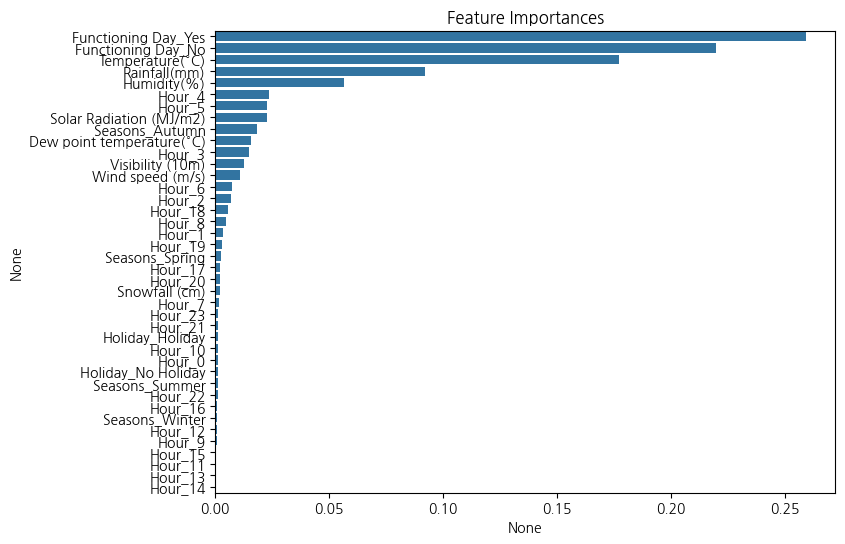

In [500]:
importances_values = pd.Series(rf.feature_importances_, index=x_train_bs.columns).sort_values(ascending=False)


# 상위 15개 변수 중요도 선택
top_15_importances = importances_values.head(15)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

## 최종 모델 예측

최종 모델을 기본 모델로 결정하고 test 셋을 예측해보고자 한다.

In [501]:
test_x = df1_fin.drop('Date',axis=1)

In [502]:
test_x

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
0,0.8,58,2.200000,2000,-6.5,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-2.2,86,0.800000,990,-4.2,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-2.9,68,1.000000,1487,-7.9,0.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.9,49,0.900000,1406,-7.7,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4.6,51,1.580633,1585,-4.6,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1.8,62,2.500000,1411,-4.7,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1748,1.9,51,1.900000,1029,-7.1,1.01,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1749,7.2,23,1.200000,1945,-12.6,0.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1750,3.4,37,1.300000,2000,-9.9,0.00,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [503]:
ss1 = StandardScaler()

test_x = ss1.fit_transform(test_x) 


In [504]:
test_x

array([[-1.0405111 , -0.0280094 ,  0.23522877, ...,  0.18667989,
        -0.24992418,  0.24992418],
       [-1.29794929,  1.36411761, -1.05155582, ...,  0.18667989,
        -0.24992418,  0.24992418],
       [-1.3580182 ,  0.46917882, -0.86772945, ...,  0.18667989,
        -0.24992418,  0.24992418],
       ...,
       [-0.49130962, -1.76816818, -0.68390308, ...,  0.18667989,
        -0.24992418,  0.24992418],
       [-0.817398  , -1.07210467, -0.5919899 , ...,  0.18667989,
        -0.24992418,  0.24992418],
       [-0.94611709, -0.77379174, -1.60303493, ...,  0.18667989,
        -0.24992418,  0.24992418]])

In [505]:
test['Rented Bike Count'] = 0
test['Rented Bike Count'] = np.exp(rf.predict(test_x)).astype(int)

In [506]:
test

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,11/07/2018,22,27.1,79,1.2,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes,375
1,28/11/2018,11,5.7,15,1.1,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes,205
2,18/04/2018,15,19.0,21,3.3,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes,261
3,09/03/2018,14,8.0,42,NaN,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes,276
4,28/10/2018,16,12.2,65,1.9,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,08/05/2018,7,15.3,60,2.0,2000,7.5,0.35,0.0,0.0,Spring,No Holiday,Yes,612
1748,19/03/2018,17,8.5,59,2.7,1927,0.9,0.16,0.0,0.0,Spring,No Holiday,Yes,649
1749,04/10/2018,20,21.3,53,1.8,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,No,741
1750,08/10/2018,12,19.2,31,0.5,1994,1.6,2.40,0.0,0.0,Autumn,No Holiday,Yes,733


In [507]:
test

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,11/07/2018,22,27.1,79,1.2,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes,375
1,28/11/2018,11,5.7,15,1.1,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes,205
2,18/04/2018,15,19.0,21,3.3,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes,261
3,09/03/2018,14,8.0,42,NaN,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes,276
4,28/10/2018,16,12.2,65,1.9,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,08/05/2018,7,15.3,60,2.0,2000,7.5,0.35,0.0,0.0,Spring,No Holiday,Yes,612
1748,19/03/2018,17,8.5,59,2.7,1927,0.9,0.16,0.0,0.0,Spring,No Holiday,Yes,649
1749,04/10/2018,20,21.3,53,1.8,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,No,741
1750,08/10/2018,12,19.2,31,0.5,1994,1.6,2.40,0.0,0.0,Autumn,No Holiday,Yes,733


In [508]:
test.to_csv('test_정가경.csv', index = False)